CONECTION WITH IB

In [1]:
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=11)

<IB connected to 127.0.0.1:7497 clientId=11>

IMPORTINGS

In [2]:
import pandas as pd
import numpy as np
import talib as tal
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

CONTRATO

In [3]:
contract = Forex("EURUSD")

HISTORICAL DATA WITH REALTIME UPDATES

In [4]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=1,
        keepUpToDate=True)


HISTORICAL DATA AS DATAFRAME

In [5]:
data_df = util.df(bars)
data_df.tail()

,date,open,high,low,close,volume,average,barCount
1144,2019-08-28 11:19:00,1.107785,1.107820,1.107770,1.107785,-1,-1.0,-1
1145,2019-08-28 11:20:00,1.107785,1.107785,1.107670,1.107715,-1,-1.0,-1
1146,2019-08-28 11:21:00,1.107715,1.107725,1.107665,1.107695,-1,-1.0,-1
1147,2019-08-28 11:22:00,1.107695,1.107715,1.107665,1.107665,-1,-1.0,-1
1148,2019-08-28 11:23:00,1.107665,1.107750,1.107625,1.107685,-1,-1.0,-1


ADDING MACD COLUMNS TO DATA

In [6]:
#data_df["macd_2"] = macd_2
#data_df["macd_tal"] = macd_tal
#data_df

CANDLESTICK CHART

In [7]:
#Axis x for organize
#rcParams['figure.figsize'] = 12, 20 (Could be useful for size)


In [8]:
chart = data_df[["date", "open", "high", "low","close"]]

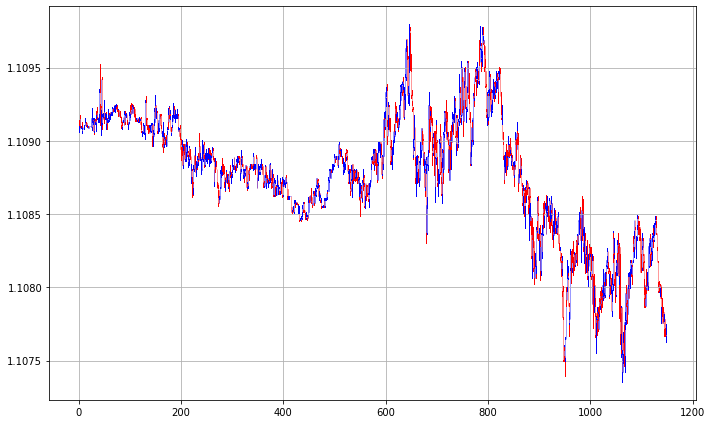

In [9]:
util.barplot(chart)
plt.tight_layout()

LINE CHART

/home/mostoro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


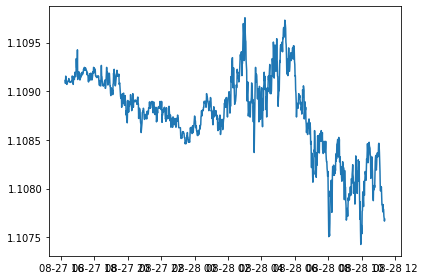

In [10]:
plt.plot(data_df.date, data_df.close, label='EURUSD')
plt.style.use("tableau-colorblind10")
plt.tight_layout()

TICK BY TICK DATA FOR ENTRY THE ORDER (BID/ASK)

In [11]:
ticker = ib.reqTickByTickData(contract, 'BidAsk')
print(ticker)

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'), ticks=[], tickByTicks=[], domBids=[], domAsks=[], domTicks=[])


MACD (WITH TALIB)

In [12]:
#Variables
macd_fast = 12
macd_slow = 26
macd_signal = 9

In [13]:
#Selecting close price
#Changing to type float to avoid problems with talib

close_price = data_df.close.astype(float)

In [14]:
x = tal.MACD(close_price, fastperiod=macd_fast, slowperiod=macd_slow, signalperiod=macd_signal)
x = pd.DataFrame(x)
x.to_csv(r'/home/mostoro/x.csv')

In [15]:
macd_tal = tal.MACD(close_price, fastperiod=macd_fast, slowperiod=macd_slow, signalperiod=macd_signal)
macd_tal

(0            NaN
 1            NaN
 2            NaN
 3            NaN
 4            NaN
 5            NaN
 6            NaN
 7            NaN
 8            NaN
 9            NaN
 10           NaN
 11           NaN
 12           NaN
 13           NaN
 14           NaN
 15           NaN
 16           NaN
 17           NaN
 18           NaN
 19           NaN
 20           NaN
 21           NaN
 22           NaN
 23           NaN
 24           NaN
 25           NaN
 26           NaN
 27           NaN
 28           NaN
 29           NaN
           ...   
 1119    0.000017
 1120    0.000028
 1121    0.000038
 1122    0.000045
 1123    0.000047
 1124    0.000051
 1125    0.000054
 1126    0.000063
 1127    0.000070
 1128    0.000072
 1129    0.000068
 1130    0.000056
 1131    0.000039
 1132    0.000011
 1133   -0.000013
 1134   -0.000029
 1135   -0.000043
 1136   -0.000051
 1137   -0.000064
 1138   -0.000081
 1139   -0.000094
 1140   -0.000104
 1141   -0.000115
 1142   -0.000117
 1143   -0

In [16]:
#Convert tupla to data frame (neccesary to apply macd.plot and for extract the first row too)
macd_tal = pd.DataFrame(macd_tal)
macd_tal

,0,1,2,3,4,5,6,7,8,9,...,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000094,-0.000104,-0.000115,-0.000117,-0.000121,-0.000122,-0.000128,-0.000132,-0.000136,-0.000137
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000042,-0.000055,-0.000067,-0.000077,-0.000085,-0.000093,-0.000100,-0.000106,-0.000112,-0.000117
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000052,-0.000049,-0.000049,-0.000040,-0.000035,-0.000029,-0.000028,-0.000026,-0.000024,-0.000020


In [17]:
#Extracting the first row. It is neccesary to includ in data_df the information only about macd (no signal and histogram)
macd_tal = macd_tal.iloc[0]

In [18]:
#Converting the first row (macd) to data frame, the idea is to includ this in data_df
macd_tal = pd.DataFrame(macd_tal)
macd_tal

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


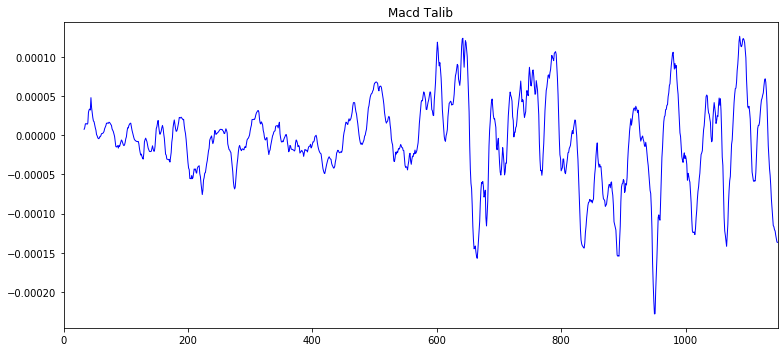

In [19]:
#Plotting macd

macd_tal.plot(color='b', figsize=(11,5), title="Macd Talib", linewidth=1, legend=False)
plt.tight_layout()

In [20]:
macd_tal

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [21]:
#short_ema = tal.EMA(np.array(close_price,dtype='f8'),timeperiod=10)

MACD OPTION 2

In [22]:
ema_fast = close_price.ewm(span=12, adjust=False).mean()

In [23]:
ema_slow = close_price.ewm(span=26, adjust=False).mean()

In [24]:
macd = ema_fast-ema_slow
macd

0       0.000000e+00
1      -2.393162e-06
2       1.742031e-06
3       5.745388e-07
4      -1.543292e-06
5      -2.786113e-06
6      -5.323525e-06
7      -6.453137e-06
8      -6.865761e-06
9      -6.313079e-06
10     -5.010401e-06
11     -3.932685e-06
12     -2.644644e-06
13     -9.915284e-09
14      1.256723e-06
15      1.038201e-06
16      5.744212e-08
17     -7.116134e-07
18     -1.704901e-06
19     -2.064828e-06
20     -1.924431e-06
21     -1.792502e-06
22     -1.668712e-06
23     -1.552709e-06
24     -1.842988e-06
25      2.736912e-06
26      6.293963e-06
27      7.413658e-06
28      9.403008e-06
29      4.472692e-06
            ...     
1119    1.696751e-05
1120    2.767344e-05
1121    3.774022e-05
1122    4.519720e-05
1123    4.733362e-05
1124    5.126006e-05
1125    5.415103e-05
1126    6.297842e-05
1127    6.997448e-05
1128    7.226513e-05
1129    6.805108e-05
1130    5.639562e-05
1131    3.864395e-05
1132    1.113317e-05
1133   -1.333975e-05
1134   -2.877194e-05
1135   -4.252

In [25]:
macd_2 = pd.DataFrame(macd)
macd_2

,close
0,0.000000e+00
1,-2.393162e-06
2,1.742031e-06
3,5.745388e-07
4,-1.543292e-06
5,-2.786113e-06
6,-5.323525e-06
7,-6.453137e-06
8,-6.865761e-06
9,-6.313079e-06


In [26]:
signal_line = macd_2.ewm(span=9, adjust=False).mean()


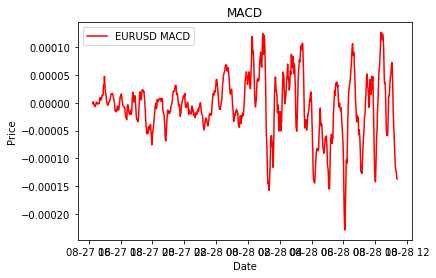

In [27]:
plt.plot(data_df.date, macd_2, label='EURUSD MACD', color = 'r')
plt.legend(loc=0)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("MACD")
plt.show()
plt.style.use("tableau-colorblind10")

DIVERGENCE MACD #2 ROLLING

Close > rolling.max debe ser verdadero (rompió máximo)
Macd < rolling.max debe ser verdadero (no rompió máximo)

Short trade

Close < rolling.min debe ser verdadero (rompió mínimo)
Macd > rolling.min debe ser verdadero (no rompió mínimo)

Long trade

In [28]:
close_price_df

NameError: name 'close_price_df' is not defined

In [ ]:
close_max = close_price_df.rolling(window=10).max()
close_max

In [ ]:
close_min = close_price_df.rolling(window=10).min()
close_min

In [ ]:
plt.plot(close_max)
plt.plot(close_min)



In [ ]:
macd_max = macd_df.rolling(window=10).max()
macd_max

In [ ]:
macd_min = macd_df.rolling(window=10).min()
macd_min

In [ ]:
plt.plot(macd_max)
plt.plot(macd_min)


FRACTALES

In [ ]:
x = data_df.tail()
pivot = x.iloc[-3]
pivot["high"]

In [ ]:
def fractal(prices):
    
    

if  x.iloc[-4]["high"] < x.iloc[-3]["high"] and x.iloc[-5]["high"] < x.iloc[-3]["high"] and x.iloc[-2]["high"] < x.iloc[-3]["high"] and x.iloc[-1]["high"] < x.iloc[-3]["high"]:
    print("Fractal")
print("No fractal")






In [ ]:
rolling.aply
que indiqe 1 o 0
luego se adjunta al data frame de data

In [ ]:
data_df

In [ ]:
#high fractal

    High (N – 2) < High (N) 
    High (N – 1) < High (N) 
    High (N + 1) < High (N) 
    High (N + 2) < High (N) 

In [ ]:
N = 5
high (N – 2) < High (N) 


In [ ]:
#FRACTALS BILL WILLIAMS
#Variable:
 
cp = 2 (default)  
 
if high[cp] >= highest[2*cp+1](high) then
 LH = 1
else
 LH=0
endif
 
if low[cp] <= lowest[2*cp+1](low)  then
 LL= -1
else
 LL=0
endif
 
if LH=1 then
 hil = high[cp]
endif
 
if LL  = -1 then
 LOL=low[cp]
endif
 
 
return lol coloured(255,0,0) as "Low Fractal",hil coloured(0,255,0) as "High Fractal"

In [ ]:
from scipy.signal import argrelextrema

Error 10182, reqId 3: Failed to request live updates (disconnected)
Error 1100, reqId -1: Connectivity between IB and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IB and Trader Workstation has been restored - data maintained.
